In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [4]:
# Load dataset (replace path with your CSV)
df = pd.read_csv("Walmart_Sales.csv")

# Show first 5 rows
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
# Check basic info
df.info()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [6]:
# Fill missing numerical values with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [7]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract year, month, and week from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday

df.head()




,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,Weekday
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,5,4
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,12,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,19,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,26,4
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,5,4


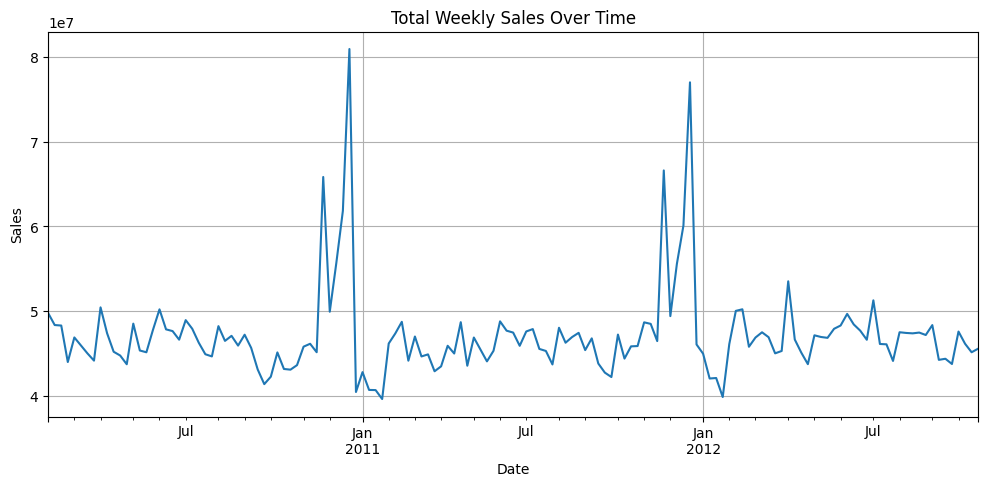

In [8]:
# Plot sales trend over time
plt.figure(figsize=(12,5))
df.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid()
plt.show()


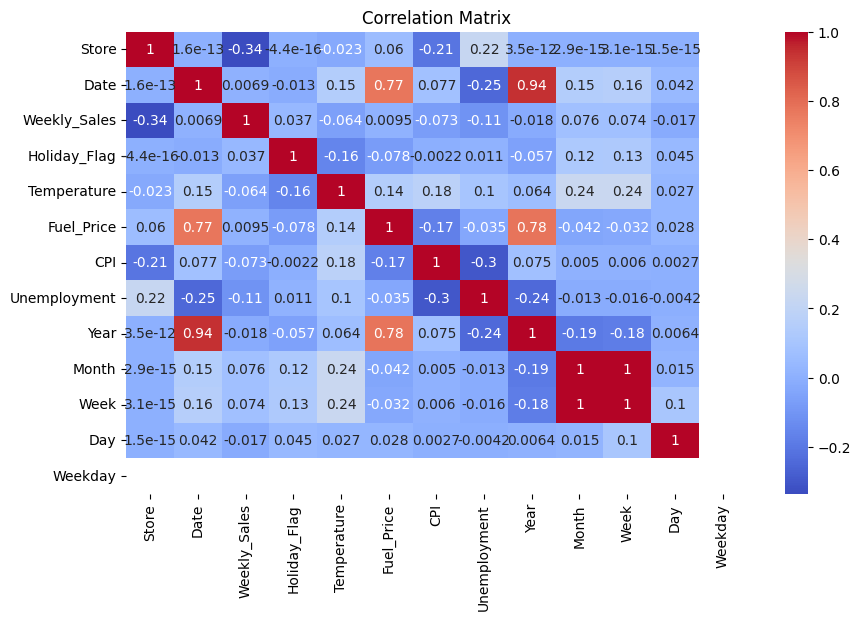

In [9]:
# Show correlation between numeric features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [10]:
# Features for training
features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year', 'Week']

# Target
target = 'Weekly_Sales'

X = df[features]
y = df[target]


In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set:", X_train.shape)
print("Testing Set:", X_test.shape)


Training Set: (5148, 9)
Testing Set: (1287, 9)


In [12]:
# Train linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
lr_pred = lr.predict(X_test)


In [13]:
# Metrics for Linear Regression
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

print(f"Linear Regression MAE: {lr_mae:.2f}")
print(f"Linear Regression RMSE: {lr_rmse:.2f}")
print(f"Linear Regression R²: {lr_r2:.4f}")


Linear Regression MAE: 432594.98
Linear Regression RMSE: 521583.50
Linear Regression R²: 0.1555


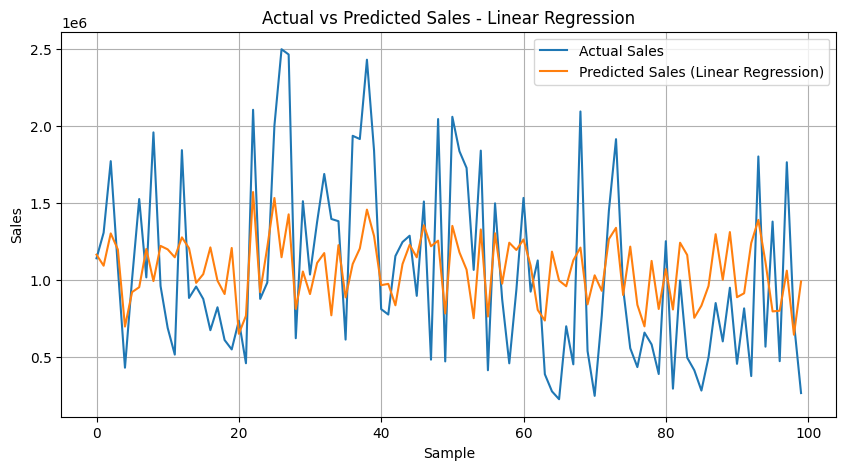

In [14]:
# Plot actual vs predicted sales
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual Sales')
plt.plot(lr_pred[:100], label='Predicted Sales (Linear Regression)')
plt.title('Actual vs Predicted Sales - Linear Regression')
plt.xlabel('Sample')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()


In [15]:
# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
rf_pred = rf.predict(X_test)


In [16]:
# Metrics for Random Forest
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest MAE: {rf_mae:.2f}")
print(f"Random Forest RMSE: {rf_rmse:.2f}")
print(f"Random Forest R²: {rf_r2:.4f}")


Random Forest MAE: 62122.38
Random Forest RMSE: 114184.42
Random Forest R²: 0.9595


In [17]:
print(" Model Comparison:")
print(f"Linear Regression R²: {lr_r2:.4f}")
print(f"Random Forest    R²: {rf_r2:.4f}")


 Model Comparison:
Linear Regression R²: 0.1555
Random Forest    R²: 0.9595


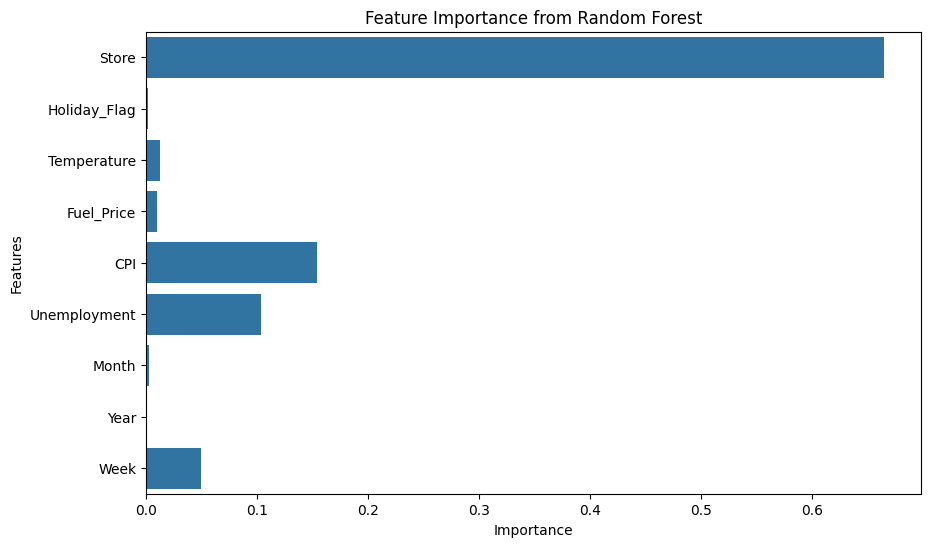

In [18]:
# Feature importance
importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


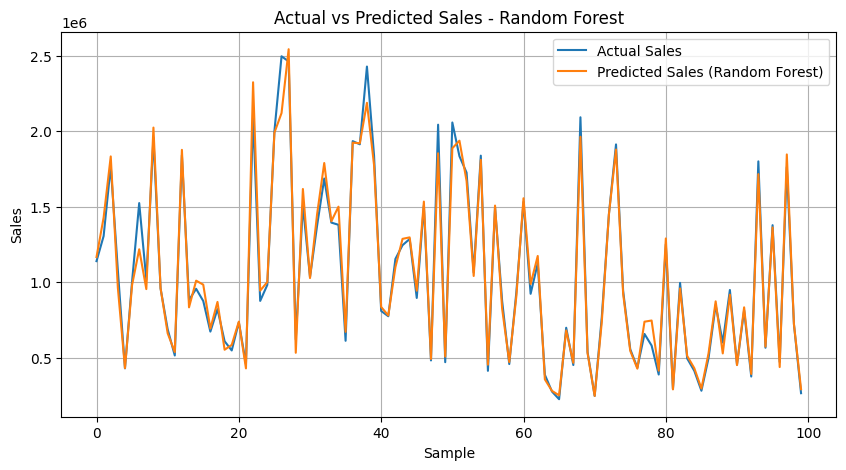

In [19]:
# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual Sales')
plt.plot(rf_pred[:100], label='Predicted Sales (Random Forest)')
plt.title('Actual vs Predicted Sales - Random Forest')
plt.xlabel('Sample')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()


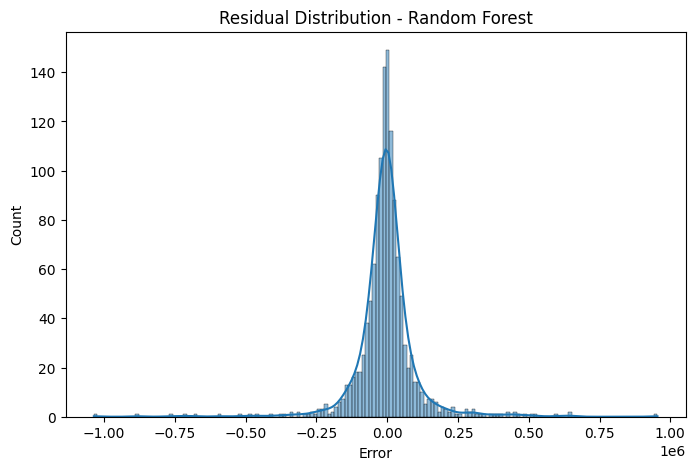

In [20]:
# Residuals
rf_residuals = y_test - rf_pred

plt.figure(figsize=(8,5))
sns.histplot(rf_residuals, kde=True)
plt.title('Residual Distribution - Random Forest')
plt.xlabel('Error')
plt.show()
